# Exploratory Analysis

In [23]:
%run 'setup_notebook.ipynb'
%run 'visualization_utilities.ipynb'

In [24]:
size_after_droppping_rows_with_missing_values(count_before_drop, count_after_drop)
print("Target (Dependent Variable): {0}".format(target_column))
print("Features: {0}".format(input_features))


    Total data points before dropna: 	32560
    Total data points after dropna: 	30161
    Data points with missing values: 	2399
    
Target (Dependent Variable): class
Features: ['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


# Standard Display of Dataframe

In [25]:
df.head(2)

,age,workclass,education,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Married,0,0,13,United-States,<=50K


# Description of Numeric Features

In [26]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,1092.044064,88.302311,40.931269
std,13.134830,7406.466611,404.121321,11.980182
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


# Check class imbalance  in the dataset

In [27]:
target_col = df[target_column].values.tolist()
count_rows = len(target_col)

In [28]:
print(balance_as_text("High Income", "Frequency",
                      target_col.count(negative_class),
                      target_col.count(negative_class),
                      len(target_col)))

print(balance_as_text("Low Income", "Frequency",
                      target_col.count(positive_class),
                      target_col.count(positive_class),
                      len(target_col)))


High Income
   Size: 22653
   Frequency 0.751


Low Income
   Size: 7508
   Frequency 0.249



# Correlation Matrix

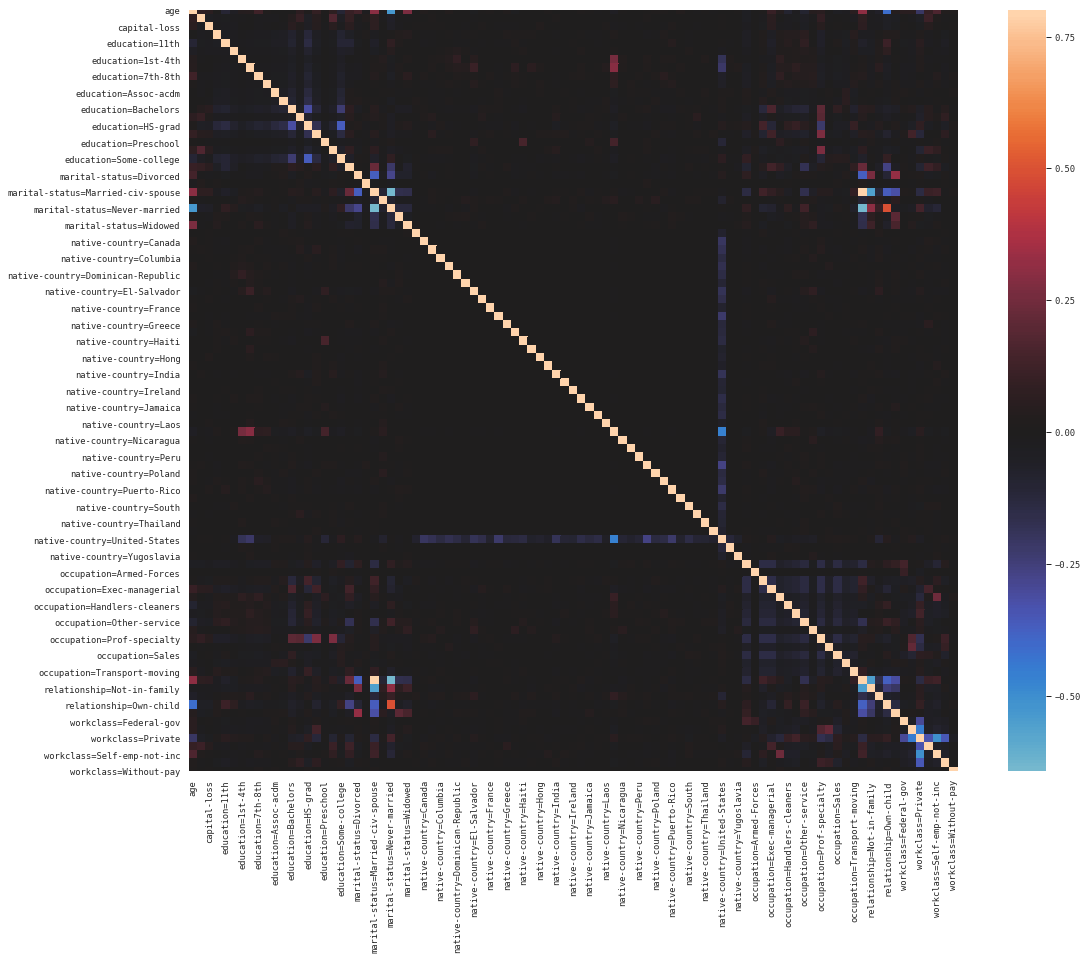

In [29]:
sns.set(context="paper", font="monospace")

df_corr = pd.DataFrame(vec_t_cat, columns=input_features_t)
corrmat = df_corr.corr()

f, ax = plt.subplots(figsize=(18, 14))
sns.heatmap(corrmat, vmax=.8, square=True, center=0)

# Pairwise influence of numerical dimensions

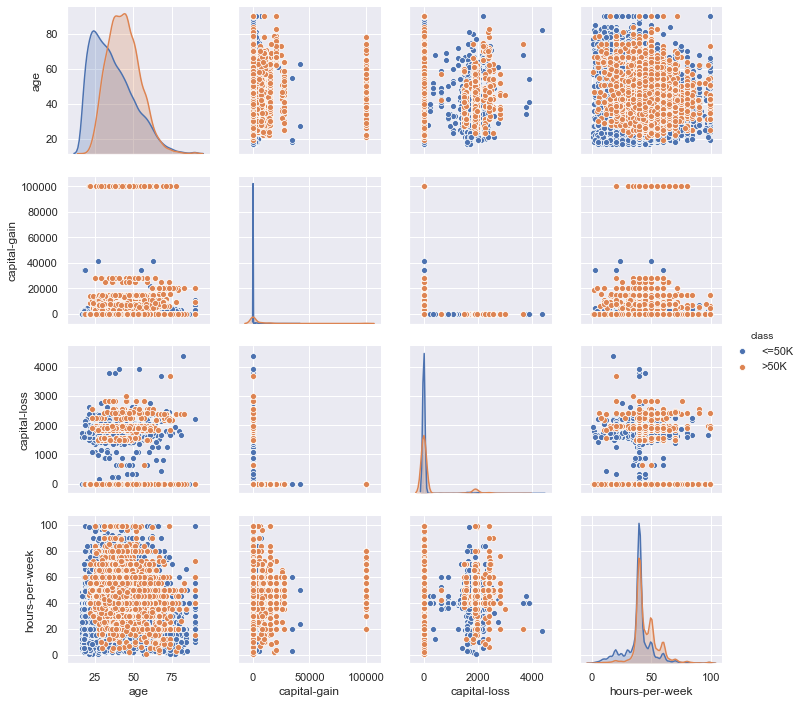

In [30]:
import seaborn as sns
sns.set()
sns.pairplot(df, hue=target_column)

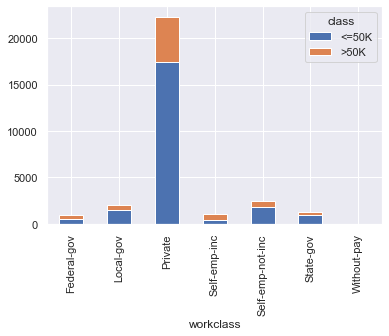

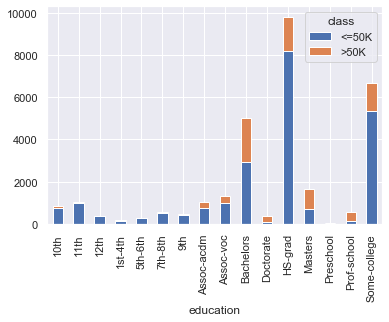

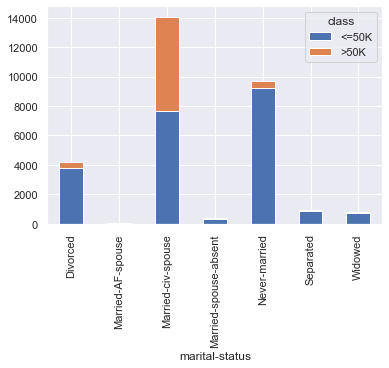

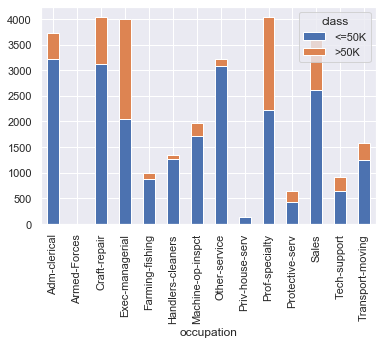

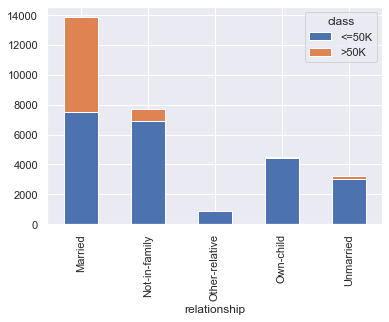

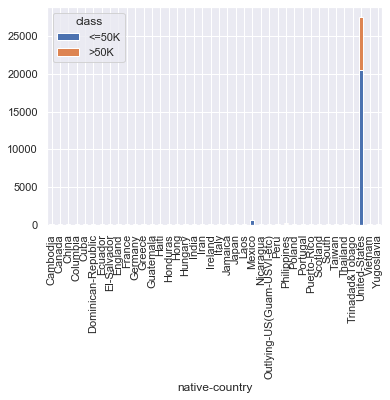

In [32]:
categorical_columns = [u'workclass', u'education', u'marital-status', u'occupation', u'relationship',  u'native-country']
for category in categorical_columns:
    pd.crosstab(df[category], df[target_column]).plot(kind='bar', stacked=True)

## Exploring unbalanced categories

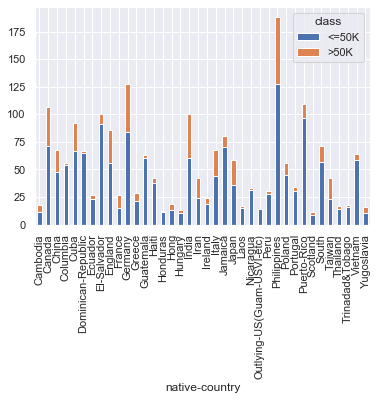

In [33]:
df_no_US = df[~df['native-country'].isin(['United-States','Mexico'])]
pd.crosstab(df_no_US['native-country'], df_no_US[target_column]).plot(kind='bar', stacked=True)